# Ambientação com o conjunto de os dados organizados pela Vigilância de Síndrome Respiratória Aguda Grave (SRAG) do Ministério da Saúde (MS)

### site: https://opendatasus.saude.gov.br/dataset/bd-srag-2020


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
low_memory = False
%matplotlib inline


In [2]:
#Gerar Dataframe
df = pd.read_csv("INFLUD-29-03-2021.csv", delimiter=';', encoding ='ISO-8859-1', error_bad_lines=False)


C:\Users\CristianoSantanaCunh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (15,60,62,63,64,92,94,106,108,115,117,118,119,123) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.shape

(1187048, 154)

In [4]:
#Colunas com problemas de tipos misturados
for i in (15,60,62,63,64,92,94,106,108,115,117,118,119,123): print(i, df.columns[i])

15 COD_IDADE
60 DT_VAC_MAE
62 DT_DOSEUNI
63 DT_1_DOSE
64 DT_2_DOSE
92 FLUASU_OUT
94 FLUBLI_OUT
106 DS_PCR_OUT
108 CLASSI_OUT
115 PAIS_VGM
117 LO_PS_VGM
118 DT_VGM
119 DT_RT_VGM
123 OUT_ANIM


In [5]:
df.head(2)

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,...,DS_AN_OUT,TP_AM_SOR,SOR_OUT,DT_CO_SOR,TP_SOR,OUT_SOR,DT_RES,RES_IGG,RES_IGM,RES_IGA
0,16/01/2020,3,07/01/2020,2,SP,GVE VIII MOGI DAS CRUZES,1333.0,MOGI DAS CRUZES,353060,HOSPITAL DAS CLINICAS LUZIA DE PINHO MELO MOGI...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,24/02/2020,9,24/01/2020,4,MG,BELO HORIZONTE,1449.0,BELO HORIZONTE,310620,HOSPITAL RISOLETA TOLENTINO NEVES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Dados numéricos

df.describe()

,SEM_NOT,SEM_PRI,CO_REGIONA,CO_MUN_NOT,CO_UNI_NOT,NU_IDADE_N,TP_IDADE,CS_GESTANT,CS_RACA,CS_ESCOL_N,...,AN_PARA1,AN_PARA2,AN_PARA3,AN_ADENO,AN_OUTRO,TP_AM_SOR,TP_SOR,RES_IGG,RES_IGM,RES_IGA
count,1.187048e+06,1.187048e+06,1.029556e+06,1.187048e+06,1.187048e+06,1.187048e+06,1.187048e+06,1.187048e+06,1.133311e+06,827117.000000,...,14.0,1.0,4.0,30.0,20770.0,110182.000000,105036.000000,129509.000000,132974.000000,85263.000000
mean,3.149100e+01,3.215342e+01,1.585376e+03,3.361114e+05,3.321186e+06,5.674751e+01,2.976805e+00,5.812013e+00,3.594301e+00,5.438329,...,1.0,1.0,1.0,1.0,1.0,1.776797,1.284274,2.281038,2.149698,4.111150
std,1.265601e+01,1.193620e+01,7.288790e+02,9.070705e+04,2.421573e+06,2.249585e+01,1.720999e-01,9.271303e-01,2.845580e+00,3.486334,...,0.0,NaN,0.0,0.0,0.0,2.223937,0.811265,1.536760,1.486925,1.361892
min,1.000000e+00,1.000000e+00,1.331000e+03,1.100010e+05,1.900000e+01,-3.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.200000e+01,2.200000e+01,1.342000e+03,2.927400e+05,2.081628e+06,4.300000e+01,3.000000e+00,5.000000e+00,1.000000e+00,2.000000,...,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,4.000000
50%,3.100000e+01,3.100000e+01,1.448000e+03,3.509500e+05,2.486199e+06,6.000000e+01,3.000000e+00,6.000000e+00,4.000000e+00,5.000000,...,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,2.000000,2.000000,4.000000
75%,4.200000e+01,4.300000e+01,1.519000e+03,3.550300e+05,3.972976e+06,7.400000e+01,3.000000e+00,6.000000e+00,4.000000e+00,9.000000,...,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,4.000000,4.000000,4.000000
max,5.300000e+01,5.300000e+01,6.256000e+03,5.300100e+05,9.997091e+06,1.480000e+02,3.000000e+00,9.000000e+00,9.000000e+00,9.000000,...,1.0,1.0,1.0,1.0,1.0,9.000000,4.000000,9.000000,9.000000,9.000000


In [7]:
#Quanto ocupa de memória
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187048 entries, 0 to 1187047
Columns: 154 entries, DT_NOTIFIC to RES_IGA
dtypes: float64(87), int64(9), object(58)
memory usage: 1.4+ GB


In [8]:
df.tail(2)

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,...,DS_AN_OUT,TP_AM_SOR,SOR_OUT,DT_CO_SOR,TP_SOR,OUT_SOR,DT_RES,RES_IGG,RES_IGM,RES_IGA
1187046,29/12/2020,53,25/12/2020,52,SP,GVE XV BAURU,1340.0,JAU,352530,SANTA CASA DE JAU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1187047,31/08/2020,36,31/08/2020,36,RO,I DRS JI PARANA,1474.0,JI-PARANA,110012,HOSPITAL DR CLAUDIONOR COUTO RORIZ,...,NaN,1.0,NaN,31/08/2020,1.0,NaN,31/08/2020,NaN,1.0,NaN


In [9]:
df.shape

(1187048, 154)

In [10]:
type(df['DT_SIN_PRI'][0])

str

In [11]:
df['DT_SIN_PRI']


0          07/01/2020
1          24/01/2020
2          12/02/2020
3          16/02/2020
4          05/02/2020
              ...    
1187043    05/12/2020
1187044    14/12/2020
1187045    19/11/2020
1187046    25/12/2020
1187047    31/08/2020
Name: DT_SIN_PRI, Length: 1187048, dtype: object

In [12]:
df['DT_SIN_PRI'] = pd.to_datetime(df['DT_SIN_PRI'], format='%d/%m/%Y')
#df['DT_SIN_PRI'] = df['DT_PRI_SIN'].dt.strftime('%d/%m/%Y')
df['DT_SIN_PRI']

0         2020-01-07
1         2020-01-24
2         2020-02-12
3         2020-02-16
4         2020-02-05
             ...    
1187043   2020-12-05
1187044   2020-12-14
1187045   2020-11-19
1187046   2020-12-25
1187047   2020-08-31
Name: DT_SIN_PRI, Length: 1187048, dtype: datetime64[ns]

In [13]:
#.astype('datetime64[M]')
df['MES']=pd.DatetimeIndex(df['DT_SIN_PRI']).month #df['DT_SIN_PRI'].astype('datetime64[M]')
df.head()

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,...,TP_AM_SOR,SOR_OUT,DT_CO_SOR,TP_SOR,OUT_SOR,DT_RES,RES_IGG,RES_IGM,RES_IGA,MES
0,16/01/2020,3,2020-01-07,2,SP,GVE VIII MOGI DAS CRUZES,1333.0,MOGI DAS CRUZES,353060,HOSPITAL DAS CLINICAS LUZIA DE PINHO MELO MOGI...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,24/02/2020,9,2020-01-24,4,MG,BELO HORIZONTE,1449.0,BELO HORIZONTE,310620,HOSPITAL RISOLETA TOLENTINO NEVES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,17/02/2020,8,2020-02-12,7,AP,NaN,NaN,MACAPA,160030,SES AP HOSPITAL DE CLINICAS DOUTOR ALBERTO LIMA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,21/02/2020,8,2020-02-16,8,PE,001,1497.0,RECIFE,261160,HOSPITAL BARAO DE LUCENA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,10/02/2020,7,2020-02-05,6,PB,I NRS JOAO PESSOA,1377.0,JOAO PESSOA,250750,HOSPITAL EDSON RAMALHO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [14]:
df['ANO']=pd.DatetimeIndex(df['DT_SIN_PRI']).year #df['DT_SIN_PRI'].astype('datetime64[M]')
df['ANO'].head()

0    2020
1    2020
2    2020
3    2020
4    2020
Name: ANO, dtype: int64

In [15]:
df['ANO'].unique()

array([2020, 2021, 2019], dtype=int64)

In [16]:
df[df['ANO']==2019]['SEM_NOT'].min()

1

In [17]:
df[df['ANO']==2019]['SEM_NOT'].max()

39

In [18]:
df[df['ANO']==2020]['SEM_NOT'].min()

1

In [19]:
df[df['ANO']==2020]['SEM_NOT'].max()

53

In [20]:
df[df['ANO']==2021]['SEM_NOT'].min()

1

In [21]:
df[df['ANO']==2021]['SEM_NOT'].max()

53

In [22]:
a = df['ANO'].unique()
a.sort()
a

array([2019, 2020, 2021], dtype=int64)

In [23]:
a = df[df['ANO']==2019]['SEM_NOT'].unique()
a.sort()
a

array([ 1,  2,  3,  4,  5,  6,  7, 10, 14, 20, 32, 34, 39], dtype=int64)

In [24]:
a=df[df['ANO']==2020]['SEM_NOT'].unique()
a.sort()
a

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53], dtype=int64)

In [25]:
a = df[df['ANO']==2021]['SEM_NOT'].unique()
a.sort()
a

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 53], dtype=int64)

In [26]:
#df['SEM_NOT'] = df['SEM_NOT'] if df['ANO'] == 2019 else (df['SEM_NOT'] + 39)  
#df['SEM_NOT'] = df['SEM_NOT'] if df['ANO'] == 2019 else (df['SEM_NOT'] + 39) 
#df['SEM_NOT'] = df['SEM_NOT'] if ((df['ANO'] == 2019) | df['ANO'] == 2020)  else df['SEM_NOT'] + 12

#df['SEM_NOT'] = df['SEM_NOT'] if (df['ANO']!=2021) & (df['SEM_NOT']!=53+12) else df['SEM_NOT'] - 12

#df['SEM_NOT'] = df['SEM_NOT'] if (df['ANO']!=2020) & (df['SEM_NOT']!=39+39) else df['SEM_NOT'] - 39
def func_a(df):
    for index, row in df.iterrows():
        if (row['ANO'] == 2020) & (row['MES']== 1) & (row['SEM_NOT'] ==39):
            df.loc[index,'SEM_NOT'] =  df.loc[index,'SEM_NOT'] 
        elif row['ANO'] == 2020:
            df.loc[index,'SEM_NOT'] =  df.loc[index,'SEM_NOT'] + 39 
        elif (row['ANO'] == 2021) & (row['MES']== 1) & (row['SEM_NOT'] == 53):
            df.loc[index,'SEM_NOT'] =  df.loc[index,'SEM_NOT'] + 39    
        elif row['ANO'] == 2021:
            df.loc[index,'SEM_NOT'] = df.loc[index,'SEM_NOT'] + 39 + 53
    



In [27]:
def func_b(df):
    for i in df.index:
        ano = df['ANO'].iloc[i]
        mes = df['MES'].iloc[i]
        semana = df['SEM_NOT'].iloc[i]

        if (ano == 2020) & (mes== 1) & (semana ==39):
            df.at[i,'SEM_NOT'] =  semana 
        elif ano == 2020:
            df.at[i,'SEM_NOT'] =  semana + 39
        elif (ano == 2021) & (mes== 1) & (semana == 53):
            df.at[i,'SEM_NOT'] =  semana + 39    
        elif ano == 2021:
            df.at[i,'SEM_NOT'] = semana + 39 + 53
#%timeit func_b(df)


In [28]:
#Tentativa de Organizar as Semanas em cada Ano
df['SEM_NOT'] = np.where (df['ANO'].values==2020, df['SEM_NOT'].values+39, df['SEM_NOT'].values)
df['SEM_NOT'] = np.where (df['ANO'].values==2021, df['SEM_NOT'].values+39+53, df['SEM_NOT'].values)
df['SEM_NOT'] = np.where ((df['ANO'].values==2020)&(df['MES'].values==1)&(39+39), 39, df['SEM_NOT'].values)
df['SEM_NOT'] = np.where ((df['ANO'].values==2021)&(df['MES'].values==1)&(39+53+53), 39+53, df['SEM_NOT'].values)


In [29]:
df.index

RangeIndex(start=0, stop=1187048, step=1)

In [30]:
df[(df['ANO']==2021) & (df['SEM_NOT']==53)].head(3)

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,...,SOR_OUT,DT_CO_SOR,TP_SOR,OUT_SOR,DT_RES,RES_IGG,RES_IGM,RES_IGA,MES,ANO


In [31]:
df[(df['ANO']==2020) & (df['SEM_NOT']==39) & (df['MES']==1)].head(3)

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,...,SOR_OUT,DT_CO_SOR,TP_SOR,OUT_SOR,DT_RES,RES_IGG,RES_IGM,RES_IGA,MES,ANO


In [32]:
#df.columns
for i in range(len(df.columns)): print(i, df.columns[i])

0 DT_NOTIFIC
1 SEM_NOT
2 DT_SIN_PRI
3 SEM_PRI
4 SG_UF_NOT
5 ID_REGIONA
6 CO_REGIONA
7 ID_MUNICIP
8 CO_MUN_NOT
9 ID_UNIDADE
10 CO_UNI_NOT
11 CS_SEXO
12 DT_NASC
13 NU_IDADE_N
14 TP_IDADE
15 COD_IDADE
16 CS_GESTANT
17 CS_RACA
18 CS_ETINIA
19 CS_ESCOL_N
20 ID_PAIS
21 CO_PAIS
22 SG_UF
23 ID_RG_RESI
24 CO_RG_RESI
25 ID_MN_RESI
26 CO_MUN_RES
27 CS_ZONA
28 SURTO_SG
29 NOSOCOMIAL
30 AVE_SUINO
31 FEBRE
32 TOSSE
33 GARGANTA
34 DISPNEIA
35 DESC_RESP
36 SATURACAO
37 DIARREIA
38 VOMITO
39 OUTRO_SIN
40 OUTRO_DES
41 PUERPERA
42 FATOR_RISC
43 CARDIOPATI
44 HEMATOLOGI
45 SIND_DOWN
46 HEPATICA
47 ASMA
48 DIABETES
49 NEUROLOGIC
50 PNEUMOPATI
51 IMUNODEPRE
52 RENAL
53 OBESIDADE
54 OBES_IMC
55 OUT_MORBI
56 MORB_DESC
57 VACINA
58 DT_UT_DOSE
59 MAE_VAC
60 DT_VAC_MAE
61 M_AMAMENTA
62 DT_DOSEUNI
63 DT_1_DOSE
64 DT_2_DOSE
65 ANTIVIRAL
66 TP_ANTIVIR
67 OUT_ANTIV
68 DT_ANTIVIR
69 HOSPITAL
70 DT_INTERNA
71 SG_UF_INTE
72 ID_RG_INTE
73 CO_RG_INTE
74 ID_MN_INTE
75 CO_MU_INTE
76 UTI
77 DT_ENTUTI
78 DT_SAIDUTI
79 SUPORT

In [33]:
#df[df['ANO']==2020]['SEM_NOT'] = df[df['ANO']==2020]['SEM_NOT']+39
#df[df['ANO']==2020]['SEM_NOT'] = df[df['ANO']==2020]['SEM_NOT'].apply(lambda x: x+39)
#for i in df[df['ANO']==2021]['SEM_NOT'].head():
#    print(df.loc[i])
#def atualiza(x, mes, ano):
#    if (x == 53 & mes == 1 & ano == 2020):
#        print(r"Excessão")
#        return x*(-1)
#    return x +1000
#df = df['SEM_NOT'].apply(atualiza(df['SEM_NOT'], df['MES'], df['ANO']))    
#df[(df['ANO']==2020) & (df['SEM_NOT']==39) & (df['MES']==1)].head(3)

#def alterar():
#    for (i,j,k) in (df['ANO'],df['MES'],df['SEM_NOT']):
#        #if ((i['ANO'] == 2020) & (i['MES'] == 1) & (i['SEM_NOT'] == 53) ):
#        #if ((i[155] == 2020) & (i[154] == 1) & (i[1] == 53) ):
#        print("oi")
#alterar()
#df[df['ANO']==2020]['SEM_NOT'].min()

In [34]:
df.shape[0]

1187048

In [35]:
#for i in range(df.shape[0]):
#    if ((df.loc[i][155] == 2020) & (df.loc[i][154] == 1) & (df.loc[i][1] == 53) ):
#        print(i)
#        print(df.loc[i][155])

In [36]:
#dicionário de dados para facilitar a leitura
Escolaridade = {0:'Sem', 
                1:'Fund1', 
                2:'Fund2', 3:'Médio',
                4:'Superior', 
                5:'Não se aplica',
                9:'Ignorado'}
Raca = {1:'Branca', 2:'Preta', 3:'Amarela', 4:'Parda', 5:'Indígena', 9:'Ignorado'}
#Obito
#Covid



In [37]:
#Corrige Raça campo 'CS_RACA'
df.loc[(df.CS_RACA.isnull()), 'CS_RACA'] = 9
df['CS_RACA'] = df['CS_RACA'].apply(lambda x: Raca[x])

#Corrige Escolaridade campo 'CS_ESCOL_N'
df.loc[(df.CS_ESCOL_N.isnull()), 'CS_ESCOL_N'] = 9
df['CS_ESCOL_N'] = df['CS_ESCOL_N'].apply(lambda x: Escolaridade[x])

#Corrige Óbito

#Corrige Covid



In [38]:
#Transformar todas as semanas de notificação como variável numérica (estava misturado texto e número)
df.SEM_NOT = df.SEM_NOT.apply(pd.to_numeric, errors='coerce')
df['DT_NOTIFIC'].dropna(inplace=True)

In [39]:
#Apresenta os novos valores para esses campos
a = df[["SEM_NOT", "DT_NOTIFIC", "CS_RACA", "CS_ESCOL_N"]].sample(10)

In [40]:
a.describe()

,SEM_NOT
count,10.000000
mean,70.700000
std,7.484057
min,58.000000
25%,67.250000
50%,69.500000
75%,71.000000
max,84.000000


In [41]:
a["CS_ESCOL_N"].value_counts()

Ignorado         6
Não se aplica    2
Fund2            1
Fund1            1
Name: CS_ESCOL_N, dtype: int64

<AxesSubplot:xlabel='SEM_NOT'>

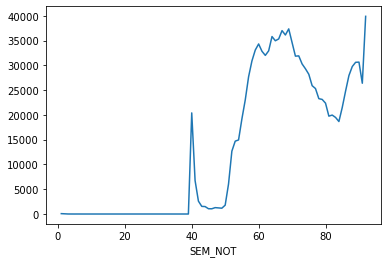

In [42]:
df.groupby('SEM_NOT').size().plot()

<AxesSubplot:ylabel='SG_UF_NOT'>

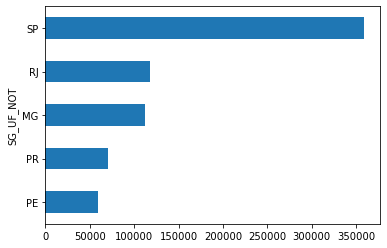

In [43]:
df.groupby('SG_UF_NOT').size().sort_values().tail(5).plot(kind='barh')

In [44]:
df.groupby('CS_RACA').size().sort_values()

CS_RACA
Indígena      3194
Amarela      12436
Preta        57450
Ignorado    256511
Parda       407620
Branca      449837
dtype: int64

In [45]:
df.groupby('CS_ESCOL_N').size().sort_values(ascending=False)

CS_ESCOL_N
Ignorado         745756
Médio            119388
Fund1            118922
Fund2             74241
Superior          56844
Sem               37344
Não se aplica     34553
dtype: int64

<AxesSubplot:xlabel='PAIS_VGM'>

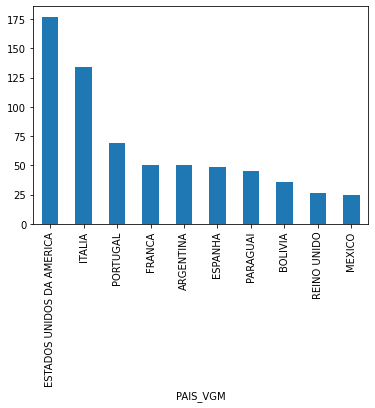

In [46]:
df.query('HISTO_VGM == 1 and PAIS_VGM != "BRASIL"').groupby('PAIS_VGM').size().sort_values(ascending=False).head(10).plot(kind='bar')

<AxesSubplot:xlabel='SEM_NOT'>

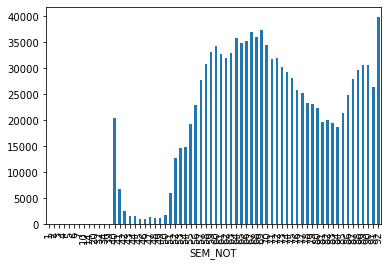

In [47]:
df.groupby('SEM_NOT').size().plot(kind='bar')


<AxesSubplot:xlabel='SEM_NOT'>

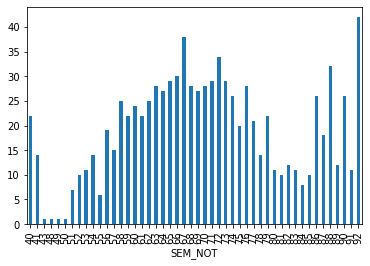

In [48]:
df.query('ID_MUNICIP == "ATIBAIA"').groupby('SEM_NOT').size().plot(kind='bar')

<AxesSubplot:title={'center':'Casos em Bragança Paulista - 2021'}, xlabel='SEM_NOT'>

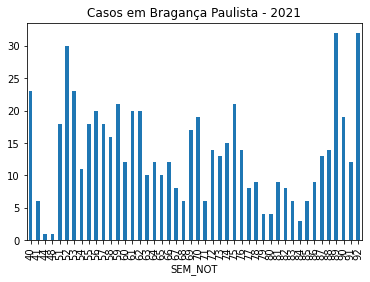

In [49]:

df.query('ID_MUNICIP == "BRAGANCA PAULISTA"').groupby('SEM_NOT').size().plot(kind='bar', title="Casos em Bragança Paulista - 2021")

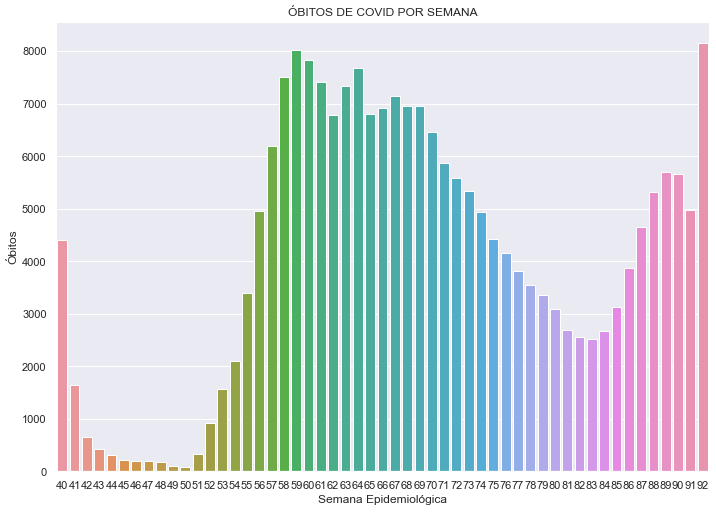

In [50]:
#OBITOS DE COVID POR SEMANA
sns.set(rc={'figure.figsize':(11.7,8.27)})
#sns.title("Teste")
fig = sns.countplot(data=df[(df['CLASSI_FIN'] == 5)&(df["EVOLUCAO"]==2)], x = 'SEM_NOT')#, hue = 'OBITO')
plt.xlabel("Semana Epidemiológica")
plt.ylabel("Óbitos")
plt.title("ÓBITOS DE COVID POR SEMANA") # You can comment this line out if you don't need title
plt.show(fig)

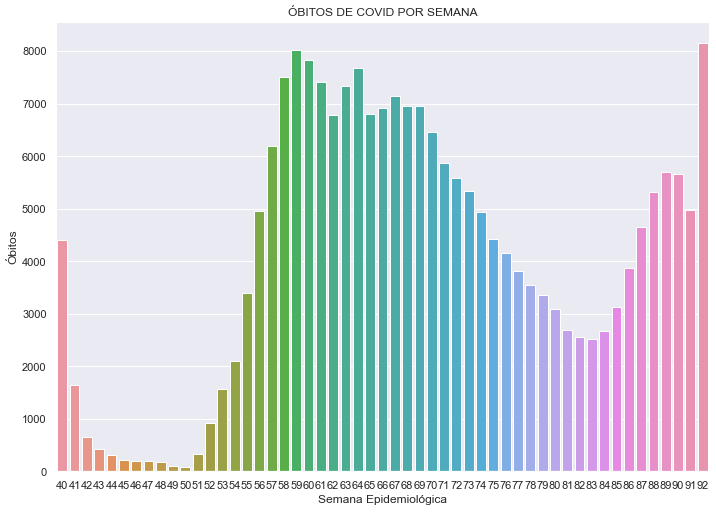

In [51]:
#OBITOS DE COVID POR SEMANA
sns.set(rc={'figure.figsize':(11.7,8.27)})
#sns.title("Teste")
fig = sns.countplot(data=df[(df["EVOLUCAO"]==2)&(df['CLASSI_FIN'] == 5)], x = 'SEM_NOT')#, hue = 'OBITO')
plt.xlabel("Semana Epidemiológica")
plt.ylabel("Óbitos")
plt.title("ÓBITOS DE COVID POR SEMANA") # You can comment this line out if you don't need title
plt.show(fig)

In [52]:
df["DT_SIN_PRI"].dtypes



dtype('<M8[ns]')

In [53]:
df.select_dtypes(include='number').head()

,SEM_NOT,SEM_PRI,CO_REGIONA,CO_MUN_NOT,CO_UNI_NOT,NU_IDADE_N,TP_IDADE,CS_GESTANT,CO_PAIS,CO_RG_RESI,...,AN_PARA3,AN_ADENO,AN_OUTRO,TP_AM_SOR,TP_SOR,RES_IGG,RES_IGM,RES_IGA,MES,ANO
0,42,2,1333.0,353060,2080680,4,2,6,1,1333.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2020
1,48,4,1449.0,310620,27863,93,3,5,1,1449.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2020
2,47,7,NaN,160030,2020645,23,3,9,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2020
3,47,8,1497.0,261160,2427427,6,2,6,1,1497.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2020
4,46,6,1377.0,250750,2400324,58,3,5,1,1377.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2020


In [54]:
df.head(5)

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,...,SOR_OUT,DT_CO_SOR,TP_SOR,OUT_SOR,DT_RES,RES_IGG,RES_IGM,RES_IGA,MES,ANO
0,16/01/2020,42,2020-01-07,2,SP,GVE VIII MOGI DAS CRUZES,1333.0,MOGI DAS CRUZES,353060,HOSPITAL DAS CLINICAS LUZIA DE PINHO MELO MOGI...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2020
1,24/02/2020,48,2020-01-24,4,MG,BELO HORIZONTE,1449.0,BELO HORIZONTE,310620,HOSPITAL RISOLETA TOLENTINO NEVES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2020
2,17/02/2020,47,2020-02-12,7,AP,NaN,NaN,MACAPA,160030,SES AP HOSPITAL DE CLINICAS DOUTOR ALBERTO LIMA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2020
3,21/02/2020,47,2020-02-16,8,PE,001,1497.0,RECIFE,261160,HOSPITAL BARAO DE LUCENA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2020
4,10/02/2020,46,2020-02-05,6,PB,I NRS JOAO PESSOA,1377.0,JOAO PESSOA,250750,HOSPITAL EDSON RAMALHO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2020


In [55]:
#df['DT_SIN_PRI'] = df['DT_SIN_PRI'].astype(date)
# verwriting data after changing format
df['DT_SIN_PRI']= pd.to_datetime(df['DT_SIN_PRI'], format='%d/%m/%Y')
df.head(5)

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,...,SOR_OUT,DT_CO_SOR,TP_SOR,OUT_SOR,DT_RES,RES_IGG,RES_IGM,RES_IGA,MES,ANO
0,16/01/2020,42,2020-01-07,2,SP,GVE VIII MOGI DAS CRUZES,1333.0,MOGI DAS CRUZES,353060,HOSPITAL DAS CLINICAS LUZIA DE PINHO MELO MOGI...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2020
1,24/02/2020,48,2020-01-24,4,MG,BELO HORIZONTE,1449.0,BELO HORIZONTE,310620,HOSPITAL RISOLETA TOLENTINO NEVES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2020
2,17/02/2020,47,2020-02-12,7,AP,NaN,NaN,MACAPA,160030,SES AP HOSPITAL DE CLINICAS DOUTOR ALBERTO LIMA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2020
3,21/02/2020,47,2020-02-16,8,PE,001,1497.0,RECIFE,261160,HOSPITAL BARAO DE LUCENA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2020
4,10/02/2020,46,2020-02-05,6,PB,I NRS JOAO PESSOA,1377.0,JOAO PESSOA,250750,HOSPITAL EDSON RAMALHO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2020


In [56]:
df["DT_SIN_PRI"].min()

Timestamp('2019-12-29 00:00:00')

In [57]:
df["DT_SIN_PRI"].max()

Timestamp('2021-01-02 00:00:00')

In [58]:
df['SEM_NOT'].unique()

array([42, 48, 47, 46, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61,
       62, 63, 64, 65, 45, 66, 67, 44, 68, 69, 43, 70, 71, 40, 72, 73, 74,
       75, 76, 77, 78, 92, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90,
       91, 41,  1,  7,  2, 20,  5,  3, 34,  6, 32,  4, 10, 14, 39],
      dtype=int64)

In [59]:
df[df['SEM_PRI']==1].head(50)

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,...,SOR_OUT,DT_CO_SOR,TP_SOR,OUT_SOR,DT_RES,RES_IGG,RES_IGM,RES_IGA,MES,ANO
1289,02/01/2020,40,2020-01-01,1,RS,006 CRS,1611.0,PASSO FUNDO,431410,HOSPITAL SAO VICENTE DE PAULO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2020
17474,05/01/2020,41,2020-01-02,1,CE,21 CRES JUAZEIRO DO NORTE,1531.0,BARBALHA,230190,SERVICO DE VERIFICACAO DE OBITOS E CAUSAS MORT...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2020
17846,09/01/2020,41,2020-01-03,1,SP,GVE XVII CAMPINAS,1342.0,CAMPINAS,350950,HOSPITAL E MATERNIDADE CELSO PIERRO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2020
17852,03/03/2020,49,2020-01-01,1,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030,HOSPITAL INFANTIL SABARA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2020
18100,03/01/2020,1,2019-12-31,1,SP,GVE XVII CAMPINAS,1342.0,CAMPINAS,350950,HOSPITAL MUNICIPAL DR MARIO GATTI CAMPINAS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,2019
18268,10/02/2020,7,2019-12-31,1,MG,BELO HORIZONTE,1449.0,BELO HORIZONTE,310620,HOSPITAL RISOLETA TOLENTINO NEVES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,2019
18269,09/01/2020,2,2019-12-31,1,CE,1 CRES FORTALEZA,1519.0,FORTALEZA,230440,HOSPITAL LUIZ FRANCA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,2019
20090,02/01/2020,40,2020-01-02,1,SE,REGIONAL ARACAJU,2056.0,ARACAJU,280030,HOSPITAL SANTA IZABEL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2020
20415,06/01/2020,2,2019-12-30,1,SP,GVE XVIII FRANCA,1343.0,FRANCA,351620,SANTA CASA DE FRANCA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,2019
25091,31/12/2019,1,2019-12-29,1,SC,JARAGUA DO SUL,1567.0,JARAGUA DO SUL,420890,HOSPITAL E MATERNIDADE JARAGUA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,2019
